# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Aulia Malik
- **Email:** auliamalik@mail.ugm.ac.id
- **ID Dicoding:** aulia_malik_XYiL

## Menentukan Pertanyaan Bisnis

- Bagaimana Pengaruh kondisi lingkungan terhadap jumlah penyewaan?
- Bagaimana pengaruh musim, bulan, dan hari pada pola penggunaan layanan bike sharing?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
day_data = pd.read_csv('day.csv')
hour_data = pd.read_csv('hour.csv')


print("Data Harian:")
print(day_data.head())
print("                       ")

print("Data Per Jam:")
print(hour_data.head())


Data Harian:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
             

**Insight:**
- Pada tahap gathering data ini digunakan fungsi read dari library Pandas untuk membaca dua buah file CSV, yaitu day.csv dan hour.csv.
- Perintah head() digunakan untuk memastikan bahwa data telah berhasil dibaca.

### Assessing Data

In [ ]:
day_data.info()
day_data.isna().sum()
print("Jumlah duplikasi: ", day_data.duplicated().sum())
numeric_columns = day_data.select_dtypes(include=[np.number])
outliers_count = {}
for column in numeric_columns.columns:
    data = numeric_columns[column]
    q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off
    outliers = [x for x in data if x < minimum or x > maximum]
    outliers_count[column] = len(outliers)
outliers_series = pd.Series(outliers_count)
print("\nOutlier:")
print(outliers_series)
day_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah duplikasi:  0

Outlier:
instant        0
season         0
yr             0
mnth       

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
hour_data.info()
hour_data.isna().sum()
print("Jumlah duplikasi: ", hour_data.duplicated().sum())
numeric_columns = hour_data.select_dtypes(include=[np.number])
outliers_count = {}
for column in numeric_columns.columns:
    data = numeric_columns[column]
    q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off
    outliers = [x for x in data if x < minimum or x > maximum]
    outliers_count[column] = len(outliers)
outliers_series = pd.Series(outliers_count)
print("\nOutlier:")
print(outliers_series)
hour_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
Jumlah duplikasi:  0

Outlier:
instant          0

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ada data dengan missing value, invalid value, duplicate data, inaccurate value, dan inconsistent value setelah dilakukan pengecekan.
- Terdapat beberapa data yang memiliki outlier seperti holiday_hour memiliki 500 outlier, windspeed_hour memiliki 342 outlier, casual_hour dan registered_hour juga menunjukkan jumlah yang signifikan. Kemungkinan terdapat nilai ekstream pada data-data tersebut.


### Cleaning Data

In [ ]:
print("Jumlah duplikasi: ", day_data.duplicated().sum())
print("Missing value: ")
print(day_data.isna().sum())
print(" ")
# Mengatasi outlier menggunakan drop
numeric_columns = day_data.select_dtypes(include=[np.number])
outlier_indices = set()
for column in numeric_columns.columns:
    Q1 = numeric_columns[column].quantile(0.25)
    Q3 = numeric_columns[column].quantile(0.75)
    IQR = Q3 - Q1
    maximum = Q3 + (1.5 * IQR)
    minimum = Q1 - (1.5 * IQR)
    kondisi_lower_than = numeric_columns[column] < minimum
    kondisi_more_than = numeric_columns[column] > maximum
    outlier_indices.update(numeric_columns[kondisi_lower_than].index)
    outlier_indices.update(numeric_columns[kondisi_more_than].index)

# Menghapus baris yang mengandung outlier
day_data.drop(index=outlier_indices, inplace=True)
print("Data setelah menghapus outlier:")

outliers_count = {}
for column in numeric_columns.columns:
    data = numeric_columns[column]
    q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off
    outliers = [x for x in data if x < minimum or x > maximum]
    outliers_count[column] = len(outliers)
outliers_series = pd.Series(outliers_count)
print(outliers_series)
day_data.describe()

Jumlah duplikasi:  0
Missing value: 
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
 
Data setelah menghapus outlier:
instant        0
season         0
yr             0
mnth           0
holiday       21
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            2
windspeed     13
casual        44
registered     0
cnt            0
dtype: int64


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,655.000000,655.000000,655.000000,655.000000,655.0,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.00000,655.000000,655.000000
mean,357.366412,2.506870,0.474809,6.545038,0.0,2.993893,0.748092,1.407634,0.491363,0.470946,0.633358,0.186224,737.60000,3660.157252,4397.757252
std,211.948901,1.118184,0.499747,3.482684,0.0,1.929164,0.434441,0.550454,0.185020,0.164436,0.140990,0.072228,522.93126,1570.067857,1854.957213
min,1.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.059130,0.079070,0.275833,0.022392,2.00000,20.000000,22.000000
25%,174.500000,1.500000,0.000000,3.500000,0.0,1.000000,0.000000,1.000000,0.330833,0.329850,0.524900,0.133721,303.50000,2506.500000,3129.000000
50%,348.000000,3.000000,0.000000,7.000000,0.0,3.000000,1.000000,1.000000,0.485833,0.474117,0.630833,0.176625,684.00000,3643.000000,4456.000000
75%,544.500000,3.000000,1.000000,10.000000,0.0,5.000000,1.000000,2.000000,0.653750,0.607960,0.734583,0.230723,1028.00000,4737.000000,5651.000000
max,731.000000,4.000000,1.000000,12.000000,0.0,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.378108,2258.00000,6946.000000,8173.000000


In [ ]:
print("Jumlah duplikasi: ", hour_data.duplicated().sum())
print("Misiing Value: ")
print(hour_data.isna().sum())
print(" ")
#tidak ada inaccurate value
#tidak ada nilai yang tidak valid
#tidak ada nilai yang tidak konsisten

# Mengatasi outlier menggunakan drop
numeric_columns = hour_data.select_dtypes(include=[np.number])
outlier_indices = set()
for column in numeric_columns.columns:
    Q1 = numeric_columns[column].quantile(0.25)
    Q3 = numeric_columns[column].quantile(0.75)
    IQR = Q3 - Q1
    maximum = Q3 + (1.5 * IQR)
    minimum = Q1 - (1.5 * IQR)
    kondisi_lower_than = numeric_columns[column] < minimum
    kondisi_more_than = numeric_columns[column] > maximum
    outlier_indices.update(numeric_columns[kondisi_lower_than].index)
    outlier_indices.update(numeric_columns[kondisi_more_than].index)

# Menghapus baris yang mengandung outlier
hour_data.drop(index=outlier_indices, inplace=True)
print("Data setelah menghapus outlier:")

outliers_count = {}
for column in numeric_columns.columns:
    data = numeric_columns[column]
    q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off
    outliers = [x for x in data if x < minimum or x > maximum]
    outliers_count[column] = len(outliers)
outliers_series = pd.Series(outliers_count)
print(outliers_series)

hour_data.describe()

Jumlah duplikasi:  0
Misiing Value: 
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
 
Data setelah menghapus outlier:
instant          0
season           0
yr               0
mnth             0
hr               0
holiday        500
weekday          0
workingday       0
weathersit       3
temp             0
atemp            0
hum             22
windspeed      342
casual        1192
registered     680
cnt            505
dtype: int64


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000,14799.0,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000
mean,8429.853639,2.489898,0.474965,6.511318,11.165890,0.0,3.024191,0.734847,1.444354,0.483410,0.464407,0.644950,0.180161,23.769647,125.060342,148.829989
std,5021.788339,1.119989,0.499390,3.496449,7.152273,0.0,1.953634,0.441430,0.647801,0.190873,0.170517,0.188672,0.111812,26.523112,113.946827,131.380486
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4096.500000,1.000000,0.000000,3.000000,5.000000,0.0,1.000000,0.000000,1.000000,0.320000,0.318200,0.500000,0.104500,3.000000,28.000000,33.000000
50%,8245.000000,2.000000,0.000000,7.000000,11.000000,0.0,3.000000,1.000000,1.000000,0.480000,0.469700,0.650000,0.164200,13.000000,100.000000,120.000000
75%,12743.500000,3.000000,1.000000,10.000000,18.000000,0.0,5.000000,1.000000,2.000000,0.640000,0.606100,0.810000,0.253700,37.000000,186.000000,229.000000
max,17379.000000,4.000000,1.000000,12.000000,23.000000,0.0,6.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.462700,114.000000,499.000000,594.000000


**Insight:**
- Pada setdata ini tidak terjadi missing value, duplikasi data, inaccurate value, nilai tidak valid, dan nilai tidak konsisten. Namun, setdata ini memiliki outlier. Sehingga hanya dilakukan cleaning terhadap outlier saja.
- Pada cleaning data ini, digunakan metode drop karena kemungkinan terdapat nilai yang terlalu ekstream pada data dan jumlah data yang terbilang banyak. Untuk melakukan penghapusan baris, perlu dilakukan penentuan indeks untuk setiap data menggunakan loop dan penghapusan untuk setiap indeks tersebut.

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
combined_data = pd.merge(
    left=hour_data,
    right=day_data,
    how="left",
    on="dteday",
    suffixes=('_hour', '_day')
)

print("Data Gabungan:")
combined_data.head()

Data Gabungan:


,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6.0,0.0,2.0,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6.0,0.0,2.0,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6.0,0.0,2.0,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6.0,0.0,2.0,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6.0,0.0,2.0,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0


In [ ]:
day_data.groupby(by=["yr","season", "mnth",]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

casual  registered     cnt
yr season mnth                            
0  1      1       2956       34233   37189
          2       5307       38253   43560
          3       8911       31672   40583
          12      2723       18350   21073
   2      3       3869       18970   22839
          4      20803       66031   86834
          5      27146       99789  126935
          6      20299       73487   93786
   3      6      10313       39413   49726
          7      28687       96039  124726
          8      28842      107849  136691
          9      16086       67515   83601
   4      9       6702       28824   35526
          10     20840       87848  108688
          11     14594       82710   97304
          12      5295       59638   64933
1  1      1       8399       80720   89119
          2       7829       87918   95747
          3      14109       68963   83072
          12      2665       15181   17846
   2      3       7856       36005   43861
          4      23477      110263  133740
          5      24308      122652  146960
          6      16252       82977   99229
   3      6       8240       43073   51313
          7      34244      147581  181825
          8      38025      161789  199814
          9      17119       97268  114387
   4      9       6444       37960   44404
          10     24186      140811  164997
          11     16667      120451  137118
          12      9935       93170  103105

In [ ]:
hour_data.groupby(by=["yr","season", "mnth",]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

casual  registered     cnt
yr season mnth                            
0  1      1       2906       33610   36516
          2       5310       37098   42408
          3       6994       29517   36511
          12      2361       17480   19841
   2      3       3748       18768   22516
          4      13999       58613   72612
          5      19888       86719  106607
          6      13398       59547   72945
   3      6       7251       32266   39517
          7      23448       87617  111065
          8      21602       90584  112186
          9      11117       56293   67410
   4      9       4121       22570   26691
          10     14162       76141   90303
          11     11014       76798   87812
          12      5275       59436   64711
1  1      1       7202       77140   84342
          2       6661       78857   85518
          3       9378       52946   62324
          12      2658       15269   17927
   2      3       6272       27497   33769
          4      14549       71007   85556
          5      18794       84677  103471
          6      12482       53345   65827
   3      6       6983       30316   37299
          7      23447       92539  115986
          8      24758       95031  119789
          9      12390       60245   72635
   4      9       4560       22703   27263
          10     16041       90410  106451
          11     11079       86436   97515
          12      7919       69293   77212

In [ ]:
combined_data.groupby(by=["dteday"]).agg({
    "casual_day": "sum",
    "registered_day": "sum",
    "cnt_day": "sum",
    "casual_hour": "sum",
    "registered_hour": "sum",
    "cnt_hour": "sum"
})

,casual_day,registered_day,cnt_day,casual_hour,registered_hour,cnt_hour
dteday,,,,,,
2011-01-01,7944.0,15696.0,23640.0,331,654,985
2011-01-02,3013.0,15410.0,18423.0,131,670,801
2011-01-03,2640.0,27038.0,29678.0,120,1229,1349
2011-01-04,2484.0,33442.0,35926.0,108,1454,1562
2011-01-05,1886.0,34914.0,36800.0,82,1518,1600
...,...,...,...,...,...,...
2012-12-27,4940.0,37340.0,42280.0,208,1534,1742
2012-12-28,15456.0,58824.0,74280.0,644,2451,3095
2012-12-29,3498.0,26004.0,29502.0,153,1062,1215


In [ ]:
day_data.groupby(by=["temp","hum", "windspeed",]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,,,casual,registered,cnt
temp,hum,windspeed,,,
0.059130,0.400000,0.171970,93,888,981
0.096522,0.436522,0.246600,150,836,986
0.097391,0.491739,0.158330,86,1330,1416
0.107500,0.414583,0.184700,95,2273,2368
0.134783,0.494783,0.188839,53,1552,1605
...,...,...,...,...,...
0.834167,0.488750,0.165417,829,4634,5463
0.838333,0.542500,0.174138,670,3176,3846
0.848333,0.580417,0.133100,562,2825,3387


In [ ]:
hour_data.groupby(by=["temp","hum", "windspeed",]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

casual  registered  cnt
temp hum  windspeed                         
0.02 0.34 0.2836          0           2    2
     0.41 0.1642          0          59   59
          0.1940          0          16   16
     0.44 0.1343          5         310  315
          0.1940          1         151  152
...                     ...         ...  ...
0.96 0.36 0.1642         77         235  312
          0.2239         49         184  233
     0.48 0.2985         24          77  101
0.98 0.34 0.1940         82         457  539
1.00 0.19 0.1642        102         192  294

[5946 rows x 3 columns]

In [ ]:
day_data.groupby(by="dteday").cnt.sum()

,cnt
dteday,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-27,2114
2012-12-28,3095
2012-12-29,1341


In [ ]:
combined_data.to_csv("all_data.csv", index=False)

**Insight:**
- Pada bagian ini saya meliha bahwa untuk dapat melihat garis besar data dapat menggunakan data per hari, sedangkan jika ingin merinci suatu hal gunakan data per 2 jam. Hal ini saya lakukan karena kedua data tersebut memiliki garis besar yang sama.
- Kedua data tersebut tidak bisa bergabung, diperlukan sebuah suffix untuk membedakannya. Hal ini terjadi karena nilai yang mirip antara kedua data tersebut. Terjadi tumpang tindih antara kedua data dengan nilai yang sama.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

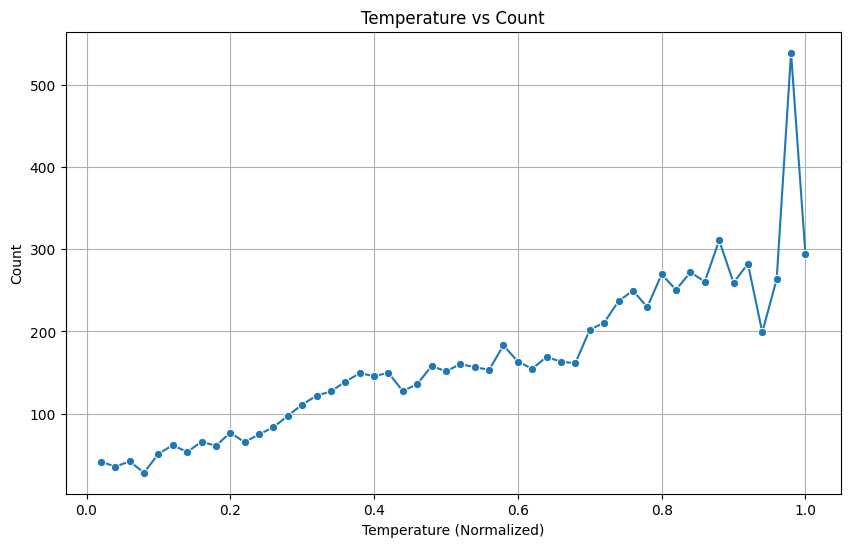

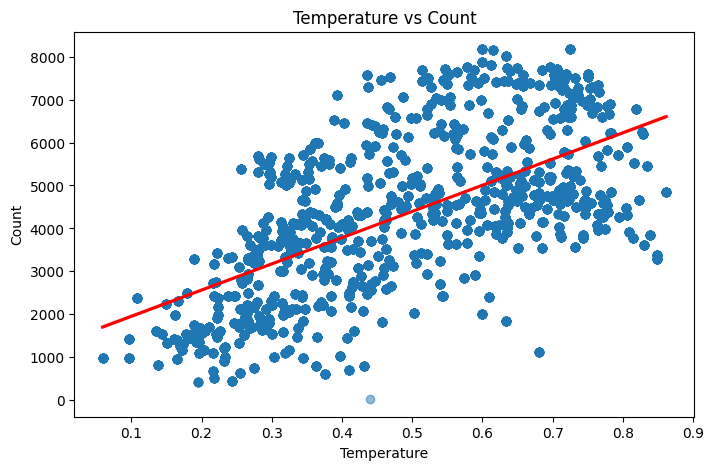

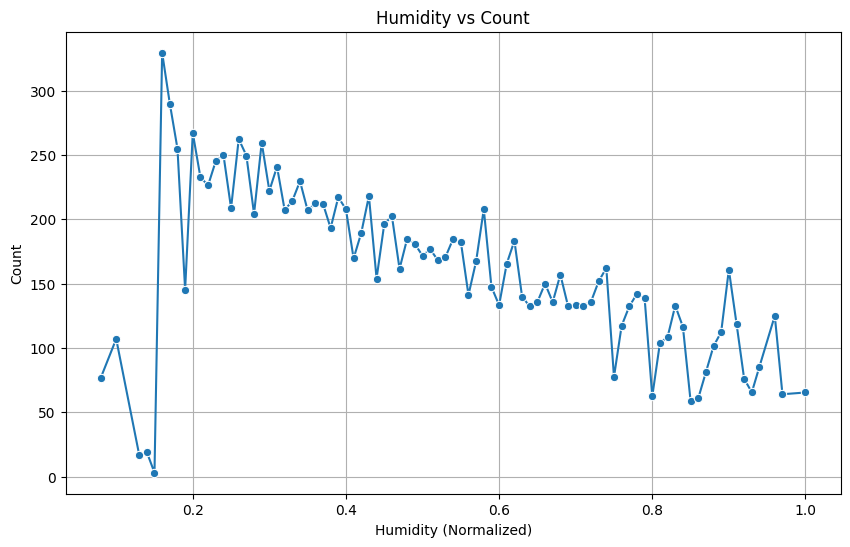

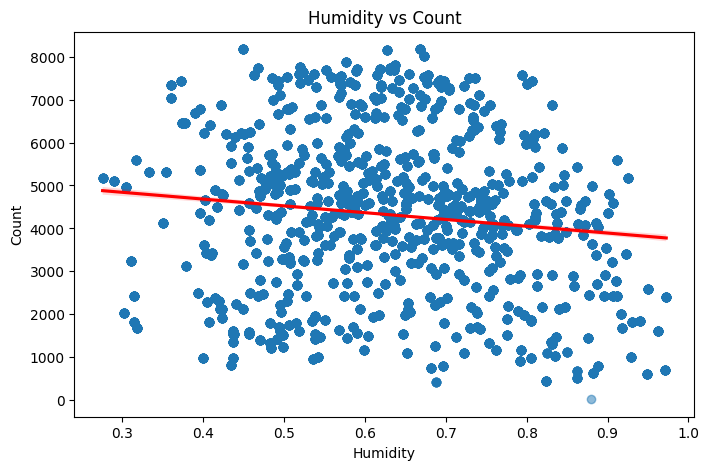

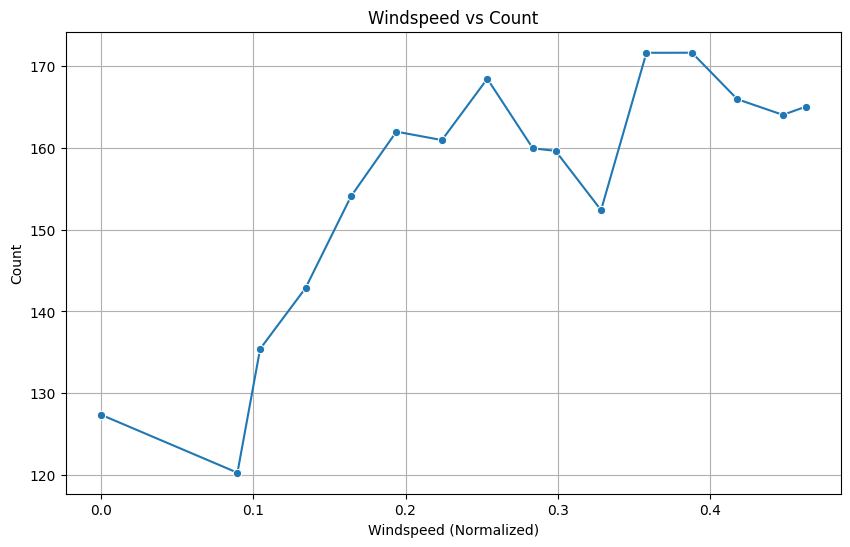

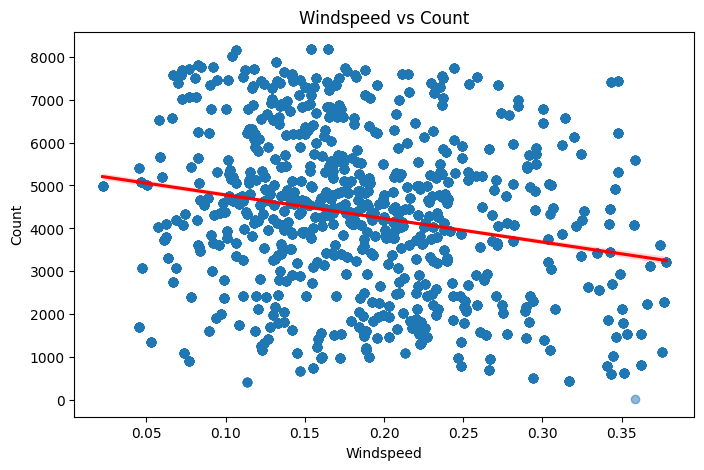

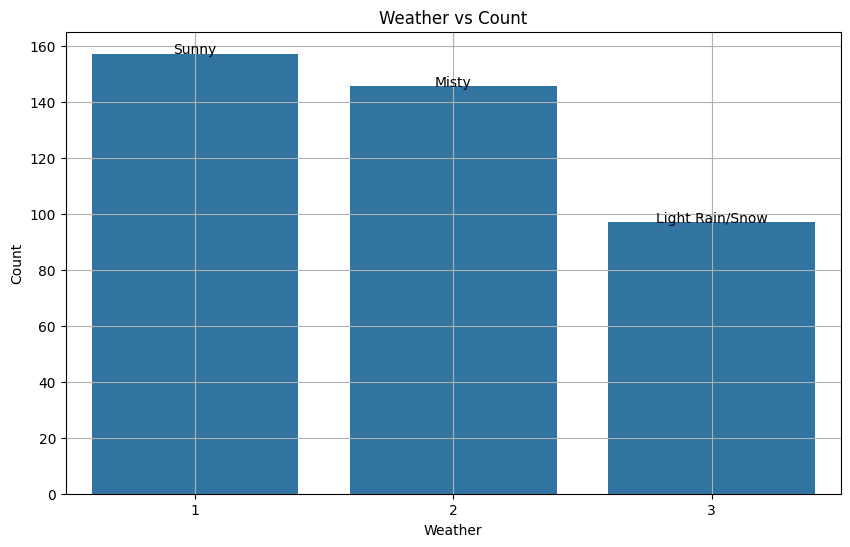

In [ ]:
# Pengaruh Suhu terhadap Jumlah Penyewaan Sepeda
temp_group = combined_data.groupby('temp_hour')['cnt_hour'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='temp_hour', y='cnt_hour', data=temp_group, marker='o')
plt.title('Temperature vs Count')
plt.xlabel('Temperature (Normalized)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
sns.regplot(x='temp_day',
            y='cnt_day',
            data=combined_data,
            scatter_kws={'alpha':0.5},
            line_kws={'color':'red'})

plt.title('Temperature vs Count')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()
plt.close()

# Pengaruh Kelembaban terhadap Jumlah Penyewaan Sepeda
hum_group = combined_data.groupby('hum_hour')['cnt_hour'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='hum_hour', y='cnt_hour', data=hum_group, marker='o')
plt.title('Humidity vs Count')
plt.xlabel('Humidity (Normalized)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
sns.regplot(x='hum_day',
            y='cnt_day',
            data=combined_data,
            scatter_kws={'alpha':0.5},
            line_kws={'color':'red'})

plt.title('Humidity vs Count')
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.show()
plt.close()

# Pengaruh Kecepatan Angin terhadap Jumlah Penyewaan Sepeda
windspeed_group = combined_data.groupby('windspeed_hour')['cnt_hour'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='windspeed_hour', y='cnt_hour', data=windspeed_group, marker='o')
plt.title('Windspeed vs Count')
plt.xlabel('Windspeed (Normalized)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
sns.regplot(x='windspeed_day',
            y='cnt_day',
            data=combined_data,
            scatter_kws={'alpha':0.5},
            line_kws={'color':'red'})

plt.title('Windspeed vs Count')
plt.xlabel('Windspeed')
plt.ylabel('Count')
plt.show()
plt.close()


# Pengaruh Kondisi Cuaca terhadap Jumlah Penyewaan Sepeda
weathersit_group = combined_data.groupby('weathersit_hour')['cnt_hour'].mean().reset_index()
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='weathersit_hour', y='cnt_hour', data=weathersit_group)
plt.title('Weather vs Count')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.grid(True)
weather_labels = {1: 'Sunny', 2: 'Misty', 3: 'Light Rain/Snow'}
for index, row in weathersit_group.iterrows():
    barplot.text(row.name, row.cnt_hour, weather_labels[row.weathersit_hour], color='black', ha="center")
plt.show()

### Pertanyaan 2:

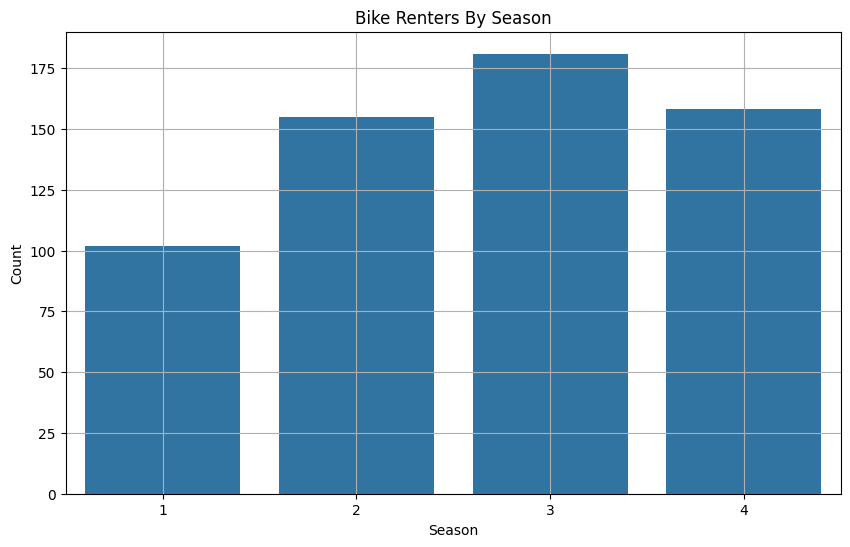

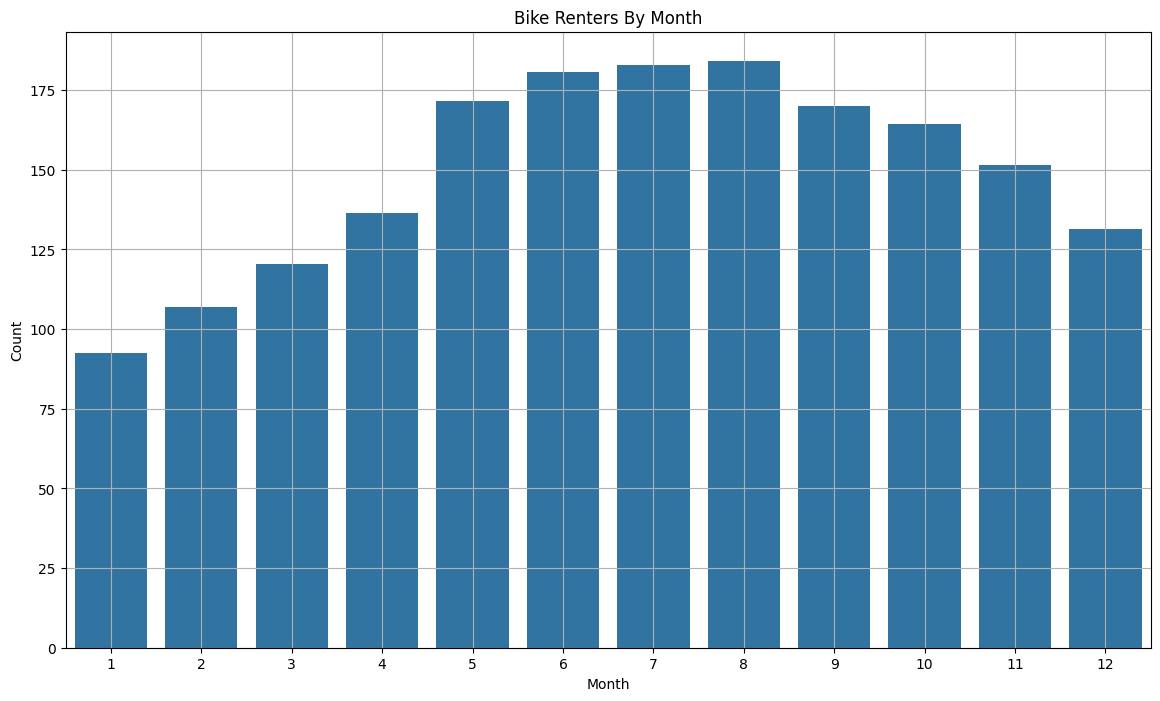

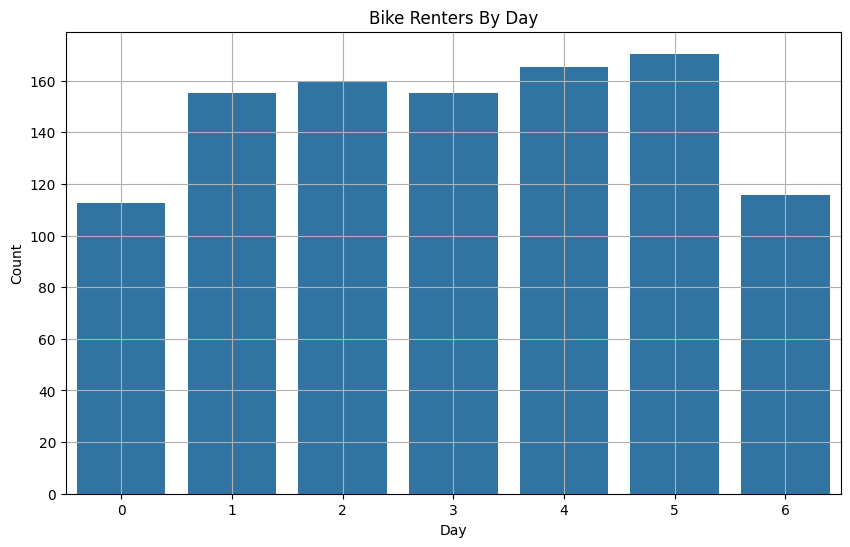

In [ ]:
# Pola Musiman dalam Penggunaan Layanan Bike Sharing
season_group = combined_data.groupby('season_hour')['cnt_hour'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='season_hour', y='cnt_hour', data=season_group)
plt.title('Bike Renters By Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Pola Bulanan dalam Penggunaan Layanan Bike Sharing
month_group = combined_data.groupby('mnth_hour')['cnt_hour'].mean().reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(x='mnth_hour', y='cnt_hour', data=month_group)
plt.title('Bike Renters By Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Pola Harian dalam Penggunaan Layanan Bike Sharing
weekday_group = combined_data.groupby('weekday_hour')['cnt_hour'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday_hour', y='cnt_hour', data=weekday_group)
plt.title('Bike Renters By Day')
plt.xlabel('Day')
plt.ylabel('Count')
plt.grid(True)
plt.show()


**Insight:**
- Pada variabel yang memiliki rentang lebih baik menggunakan line chart agar lebih rapi. Dengan menggunakan line chart, data axis yang memiliki rentang tidak perlu dijabarkan secara detail, hanya beberapa saja.
- Pada variabel dengan rentang yang sedikit saya menggunakan bar chart. Pemberian label pada kondisi cuaca untuk memperjelas maksud dan tujuan agar mudah dimengerti.

## Analisis Lanjutan (Opsional)

In [ ]:
combined_data['dteday'] = pd.to_datetime(combined_data['dteday'])

# Recency: Hari terakhir penggunaan
# Frequency: Jumlah hari penggunaan
# Monetary: Total jumlah penyewaan sepeda

rfm_df = combined_data.groupby(by="registered_hour", as_index=False).agg({
    "dteday": ["max", "nunique"],
    "cnt_hour": "sum"
})
rfm_df.columns = ["user_id", "max_usage_date", "frequency", "monetary"]
rfm_df["max_usage_date"] = rfm_df["max_usage_date"].dt.date
recent_date = combined_data["dteday"].dt.date.max()
rfm_df["recency"] = rfm_df["max_usage_date"].apply(lambda x: (recent_date - x).days)
rfm_df.drop("max_usage_date", axis=1, inplace=True)

print("RFM Data:")
print(rfm_df.head())


RFM Data:
   user_id  frequency  monetary  recency
0        0         20        30       38
1        1        147       277        0
2        2        196       613        1
3        3        236      1108        0
4        4        259      1549        3


In [ ]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df['r_rank_norm'] = (rfm_df['r_rank'] / rfm_df['r_rank'].max()) * 100
rfm_df['f_rank_norm'] = (rfm_df['f_rank'] / rfm_df['f_rank'].max()) * 100
rfm_df['m_rank_norm'] = (rfm_df['m_rank'] / rfm_df['m_rank'].max()) * 100

rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

rfm_df['RFM_score'] = 0.15 * rfm_df['r_rank_norm'] + 0.28 * rfm_df['f_rank_norm'] + 0.57 * rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)

print("RFM Data dengan Skor:")
print(rfm_df.head())


RFM Data dengan Skor:
   user_id  frequency  monetary  recency  r_rank_norm  f_rank_norm  \
0        0         20        30       38        37.30         50.9   
1        1        147       277        0       100.00         98.4   
2        2        196       613        1        95.80         99.2   
3        3        236      1108        0       100.00         99.6   
4        4        259      1549        3        88.93        100.0   

   m_rank_norm  RFM_score  
0         0.20       1.00  
1         0.40       2.14  
2         1.00       2.14  
3         3.81       2.25  
4         7.62       2.28  


In [ ]:
def segment_rfm(df):
    if df['RFM_score'] > 4.5:
        return 'Top customers'
    elif df['RFM_score'] > 4:
        return 'High value customer'
    elif df['RFM_score'] > 3:
        return 'Medium value customer'
    elif df['RFM_score'] > 1.6:
        return 'Low value customers'
    else:
        return 'Lost customers'

rfm_df['customer_segment'] = rfm_df.apply(segment_rfm, axis=1)

print("RFM Data dengan Segmentasi:")
print(rfm_df.head())


RFM Data dengan Segmentasi:
   user_id  frequency  monetary  recency  r_rank_norm  f_rank_norm  \
0        0         20        30       38        37.30         50.9   
1        1        147       277        0       100.00         98.4   
2        2        196       613        1        95.80         99.2   
3        3        236      1108        0       100.00         99.6   
4        4        259      1549        3        88.93        100.0   

   m_rank_norm  RFM_score     customer_segment  
0         0.20       1.00       Lost customers  
1         0.40       2.14  Low value customers  
2         1.00       2.14  Low value customers  
3         3.81       2.25  Low value customers  
4         7.62       2.28  Low value customers  


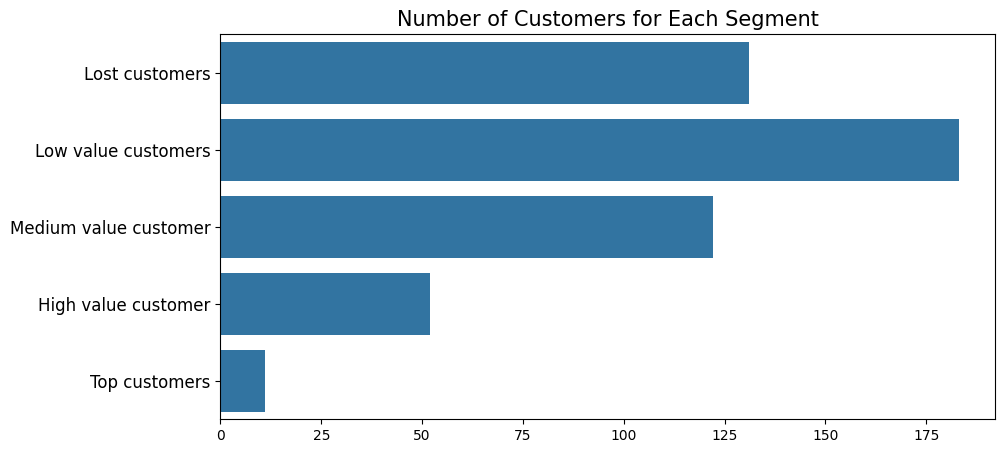

In [ ]:
plt.figure(figsize=(10, 5))

customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).user_id.nunique()
customer_segment_df.columns = ["customer_segment", "user_count"]
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "Lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

sns.barplot(
    x="user_count",
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False)
)
plt.title("Number of Customers for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Dengan menggunakan RFM  dilakukan analisis mendalam terhadap perilaku pengguna sepeda sewa berdasarkan tiga dimensi penting: Recency (seberapa baru mereka menggunakan layanan), Frequency (seberapa sering mereka menggunakan layanan), dan Monetary (berapa banyak mereka menghabiskan). Dengan membagi pelanggan ke dalam segmen yang berbeda, dapat diketahui kondisi usaha berdasarkan prilaku pengguna. Informasi yang dihasilkan dari analisis RFM dapat digunakan untuk mengambil keputusan strategis dalam hal pengembangan di masa depan.

## Conclusion

- Penyewaan sepeda meningkat ketika suhu semakin tinggi, kelembapan semakin rendah, dan cuaca semakin cerah. Sedangkan untuk kecepatan angin kurang mempengaruhi karena sangat bervariasi.
- Penyewaan sepeda paling tinggi terjadi pada musim panas (3), bulan Agustus (8), dan hari jumat (5).